
<h1><left>Introduction to Data Visualization with Matplotlib</left></h1>
By: Ana-Maria O'Brien <br>
Date: 08/09/2020
<!--eofm-->

<h1><center>Chapter 1: Introduction to Matplotlib</center></h1>

In [1]:
# Import libraries required 
import matplotlib.pyplot as plt # Import the matplotlib.pyplot submodule and name it plt
import pandas as pd
import requests
import calendar
import itertools
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

# Using the matplotlib.pyplot interface

The pyplot interface is used to create two kinds of objects: Figure objects and Axes objects.


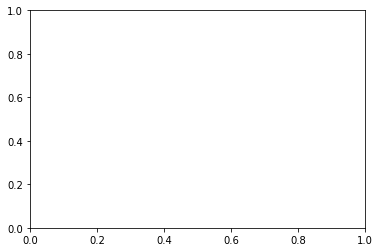

In [2]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

In [3]:
#Read csv from online into a pandas dataframe
url='https://assets.datacamp.com/production/repositories/3634/datasets/6fd451508ecce0d63354fad86704236592eed8ca/seattle_weather.csv'
seattle_weather=pd.read_csv(url)

#Convert the DATE column from number to month names
seattle_weather['DATE'] = seattle_weather['DATE'].apply(lambda x: calendar.month_abbr[x])

#Rename the DATE column to MONTH
seattle_weather.rename(columns = {'DATE':'MONTH'}, inplace = True) 
seattle_weather
   

,STATION,NAME,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",Jan,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",Feb,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,...,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1
2,USC00456295,"PALMER 3 ESE, WA US",Mar,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,...,310.0,310.0,35.9,5.0,47.0,111.0,393.0,848.0,1000.0,2.1
3,USC00456295,"PALMER 3 ESE, WA US",Apr,108.0,40.0,12.0,7.0,3.0,-7777.0,0.0,...,300.0,300.0,38.3,0.0,0.0,5.0,123.0,571.0,978.0,2.0
4,USC00456295,"PALMER 3 ESE, WA US",May,255.0,130.0,56.0,38.0,19.0,1.0,-7777.0,...,310.0,310.0,43.5,0.0,0.0,0.0,0.0,83.0,610.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,USC00454169,"KENT, WA US",Aug,673.0,518.0,363.0,301.0,209.0,17.0,8.0,...,261.0,310.0,55.6,0.0,0.0,0.0,0.0,0.0,0.0,1.9
200,USC00454169,"KENT, WA US",Sep,493.0,344.0,200.0,149.0,85.0,3.0,1.0,...,291.0,300.0,51.0,0.0,0.0,0.0,0.0,2.0,55.0,2.0
201,USC00454169,"KENT, WA US",Oct,248.0,118.0,34.0,17.0,5.0,-7777.0,-7777.0,...,310.0,310.0,44.7,0.0,0.0,0.0,67.0,344.0,773.0,2.3
202,USC00454169,"KENT, WA US",Nov,78.0,19.0,2.0,1.0,-7777.0,0.0,0.0,...,300.0,300.0,39.2,34.0,103.0,273.0,597.0,912.0,998.0,3.4


# Data Cleaning 

The seattle data file was not cleaned. I needed to sort out the Month column in order to get the same results as the datacamp course. I grouped the file by MONTH as can be seen I then reset the index in order to match the format of the file. Through researching I found a method that allowed me to arrange the MONTHS Jan-Dec. 

In [4]:
grouped_df = seattle_weather.groupby("MONTH")
maximums = grouped_df.mean() #Get mean values in each group

maximums = maximums.reset_index() #Reset indices to match format
maximums

,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,Apr,155.466667,58.000000,14.933333,7.866667,2.400000,-1555.400000,0.000000,-7258.533333,17.093333,...,300.000000,300.000000,41.126667,0.000000,0.600000,9.866667,86.066667,389.666667,839.466667,1.906667
1,Aug,623.266667,468.266667,314.133333,253.600000,167.466667,11.066667,4.933333,58.000000,21.146667,...,284.600000,310.000000,54.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000
2,Dec,14.600000,-1554.000000,-5703.133333,-3110.800000,0.000000,0.000000,0.000000,0.000000,10.253333,...,310.000000,310.000000,34.340000,143.933333,286.533333,539.333333,850.933333,991.666667,1000.000000,2.713333
3,Feb,27.866667,3.466667,-7258.466667,-6740.066667,-1036.933333,0.000000,0.000000,0.000000,13.886667,...,280.000000,280.000000,35.380000,57.600000,171.533333,412.200000,733.733333,952.533333,999.466667,2.900000
4,Jan,24.466667,-515.133333,-6221.466667,-3629.266667,-518.466667,0.000000,0.000000,0.000000,10.726667,...,310.000000,310.000000,35.613333,107.733333,245.133333,517.800000,828.200000,977.666667,999.600000,2.733333
5,Jul,611.266667,456.333333,302.800000,242.933333,159.133333,13.733333,7.266667,57.066667,20.693333,...,285.133333,309.666667,54.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.726667
6,Jun,452.866667,304.266667,165.800000,118.466667,63.333333,3.266667,-1554.133333,17.000000,18.440000,...,296.133333,300.000000,50.860000,0.000000,0.000000,0.000000,0.000000,0.133333,17.066667,1.453333
7,Mar,74.800000,17.333333,-516.400000,-3110.200000,-7777.000000,0.000000,0.000000,-4147.733333,15.333333,...,310.000000,310.000000,38.033333,6.533333,27.133333,100.666667,372.000000,787.333333,985.733333,2.060000
8,May,318.133333,176.333333,72.666667,46.200000,21.133333,-4147.266667,-7777.000000,4.133333,18.106667,...,309.666667,310.000000,46.140000,0.000000,0.000000,1.466667,6.466667,60.933333,310.266667,1.933333
9,Nov,62.600000,14.266667,-1035.533333,-4147.266667,-6221.600000,0.000000,0.000000,-518.466667,11.493333,...,300.000000,300.000000,38.793333,17.666667,60.600000,183.266667,448.266667,813.133333,991.133333,3.080000


In [20]:
# This is handy to sort out the Months from Jan-Dec
df = Sort_Dataframeby_MonthandNumeric_cols(df = maximums , monthcolumn='MONTH',numericcolumn='MLY-PRCP-NORMAL')
df

,MONTH,MLY-PRCP-NORMAL,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,Jan,7.442353,24.466667,-515.133333,-6221.466667,-3629.266667,-518.466667,0.000000,0.000000,0.000000,...,310.000000,310.000000,35.613333,107.733333,245.133333,517.800000,828.200000,977.666667,999.600000,2.733333
1,Feb,4.958235,27.866667,3.466667,-7258.466667,-6740.066667,-1036.933333,0.000000,0.000000,0.000000,...,280.000000,280.000000,35.380000,57.600000,171.533333,412.200000,733.733333,952.533333,999.466667,2.900000
2,Mar,5.389412,74.800000,17.333333,-516.400000,-3110.200000,-7777.000000,0.000000,0.000000,-4147.733333,...,310.000000,310.000000,38.033333,6.533333,27.133333,100.666667,372.000000,787.333333,985.733333,2.060000
3,Apr,4.174706,155.466667,58.000000,14.933333,7.866667,2.400000,-1555.400000,0.000000,-7258.533333,...,300.000000,300.000000,41.126667,0.000000,0.600000,9.866667,86.066667,389.666667,839.466667,1.906667
4,May,3.370000,318.133333,176.333333,72.666667,46.200000,21.133333,-4147.266667,-7777.000000,4.133333,...,309.666667,310.000000,46.140000,0.000000,0.000000,1.466667,6.466667,60.933333,310.266667,1.933333
5,Jun,2.630000,452.866667,304.266667,165.800000,118.466667,63.333333,3.266667,-1554.133333,17.000000,...,296.133333,300.000000,50.860000,0.000000,0.000000,0.000000,0.000000,0.133333,17.066667,1.453333
6,Jul,1.265882,611.266667,456.333333,302.800000,242.933333,159.133333,13.733333,7.266667,57.066667,...,285.133333,309.666667,54.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,1.726667
7,Aug,1.343529,623.266667,468.266667,314.133333,253.600000,167.466667,11.066667,4.933333,58.000000,...,284.600000,310.000000,54.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000
8,Sep,2.324118,451.000000,302.666667,165.466667,118.933333,63.400000,-1035.333333,-4665.800000,13.933333,...,296.333333,300.000000,50.173333,0.000000,0.000000,0.000000,0.000000,4.533333,72.466667,1.733333
9,Oct,4.915882,218.733333,96.933333,26.200000,13.000000,3.600000,-4147.733333,-2073.866667,-7777.000000,...,310.000000,310.000000,44.120000,0.000000,1.066667,6.933333,65.066667,295.266667,677.466667,1.866667


In [6]:
url2='https://assets.datacamp.com/production/repositories/3634/datasets/e76b460b41dc7ff286d78246daf3a8c324cb5587/austin_weather.csv'
austin_weather=pd.read_csv(url2)

#Convert the DATE column from number to month names
austin_weather['DATE'] = austin_weather['DATE'].apply(lambda x: calendar.month_abbr[x])

#Rename the DATE column to MONTH
austin_weather.rename(columns = {'DATE':'MONTH'}, inplace = True) 

 
austin_weather

,STATION,NAME,MONTH,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Jan,190,103,50,35,18,1,-7777,...,302,310,36.3,298,570,839,967,997,1000,2.9
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Feb,228,132,68,49,29,3,1,...,264,280,39.4,103,327,614,867,973,999,3.2
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Mar,446,306,185,146,98,13,6,...,270,308,46.6,10,73,242,494,761,928,3.6
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Apr,668,519,373,318,240,53,32,...,193,287,54.7,0,0,0,48,189,453,4.1
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",May,936,781,626,564,471,181,134,...,89,250,63.7,0,0,0,0,0,0,2.5
5,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Jun,1081,931,781,721,631,331,272,...,5,158,69.9,0,0,0,0,0,0,1.9
6,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Jul,1192,1037,882,820,727,417,355,...,0,83,71.7,0,0,0,0,0,0,1.3
7,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Aug,1199,1044,889,827,735,425,363,...,2,92,71.3,0,0,0,0,0,0,1.4
8,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Sep,985,835,685,625,536,246,193,...,57,226,65.3,0,0,0,0,0,0,2.5
9,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",Oct,745,591,438,379,295,83,56,...,199,284,55.9,0,0,3,25,96,264,3.7


# Adding data to an Axes object
Adding data to a figure is done by calling methods of the Axes object. 

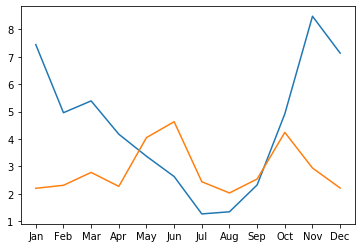

In [21]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()


# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(df['MONTH'], df['MLY-PRCP-NORMAL'])


# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])


# Call the show function
plt.show()

# Customizing data appearance

We can customize the appearance of data in our plots, while adding the data to the plot, using key-word arguments to the plot command.

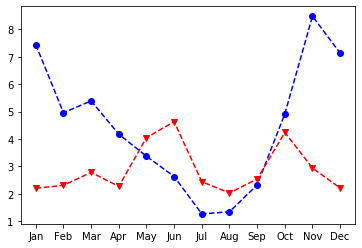

In [9]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(df["MONTH"], df["MLY-PRCP-NORMAL"], color = 'b', marker = 'o', linestyle = '--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r', marker = 'v', linestyle = '--')

# Call show to display the resulting plot
plt.show()

# Customizing axis labels and adding titles

Customizing the axis labels requires using the set_xlabel and set_ylabel methods of the Axes object. Adding a title uses the set_title method.



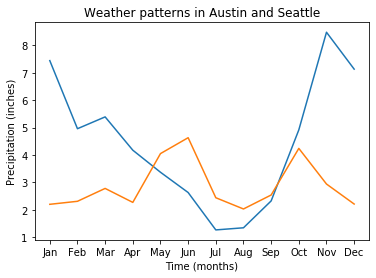

In [16]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(df['MONTH'], df['MLY-PRCP-NORMAL'])


# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])


# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

# Creating small multiples with plt.subplots

Small multiples are used to plot several datasets side-by-side. In Matplotlib, small multiples can be created using the plt.subplots() function. The first argument is the number of rows in the array of Axes objects generate and the second argument is the number of columns. 

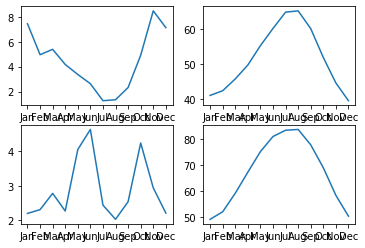

In [17]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(df["MONTH"], df["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(df["MONTH"], df["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

# Small multiples with shared y axis

When creating small multiples, it is often preferable to make sure that the different plots are displayed with the same scale used on the y-axis. This can be configured by setting the sharey key-word to True.

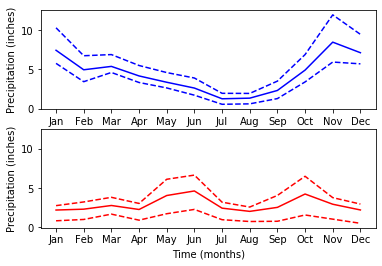

In [19]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(df['MONTH'], df['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(df['MONTH'], df["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(df['MONTH'], df["MLY-PRCP-75PCTL" ], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['MONTH'], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

ax[0].set_ylabel("Precipitation (inches)")
ax[1].set_ylabel("Precipitation (inches)")
ax[1].set_xlabel("Time (months)")


plt.show()


<h1><center>Chapter 2: Plotting time-series</center></h1>   
    

In [25]:
# Read the data from file using read_csv
url3='https://assets.datacamp.com/production/repositories/3634/datasets/411add3f8570d5adf891127fd64095020210711b/climate_change.csv'
climate_change=pd.read_csv(url3,parse_dates=['date'], index_col = 'date')

climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


# Plot time-series data

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.



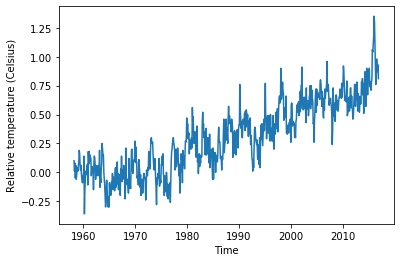

In [27]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

# Using a time index to zoom in

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a to zoom in on a particular period within the time-series using Pandas' indexing facilities. 

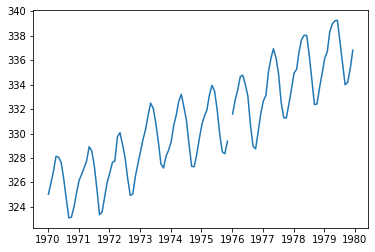

In [28]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

# Plotting two variables

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the twinx method.

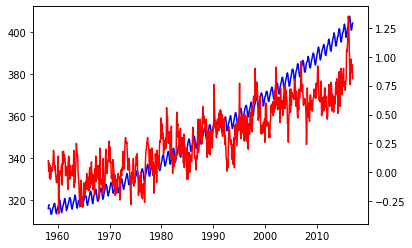

In [29]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

# Defining a function that plots time-series data

Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

In [31]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

# Using a plotting function

Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say "Don't repeat yourself".

In the previous exercise, you defined a function called plot_timeseries:

plot_timeseries(axes, x, y, color, xlabel, ylabel) <br>

that takes an Axes object (as the argument axes), time-series data (as x and y arguments) the name of a color (as a string, provided as the color argument) and x-axis and y-axis labels (as xlabel and ylabel arguments).

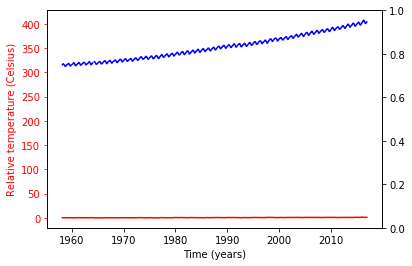

In [32]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative temperature (Celsius)')

plt.show()

# Annotating a plot of time-series data

Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

More information on annotations can be found:

https://matplotlib.org/tutorials/text/annotations.html

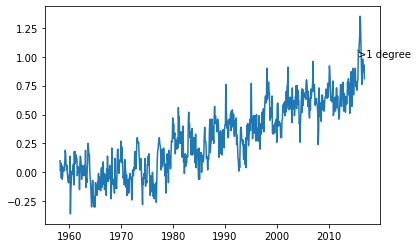

In [33]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp']) 

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy =(pd.Timestamp('2015-10-06'), 1))

plt.show()

# Plotting time-series: putting it all together

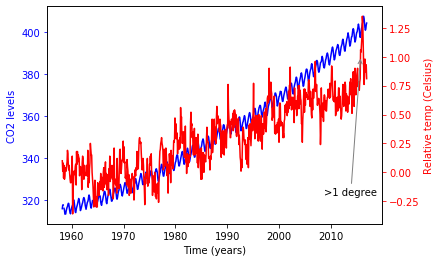

In [34]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()


<h1><center>Chapter 3: Quantitative comparisons and statistical visualizations</center></h1>  

In [36]:
url4 = 'https://assets.datacamp.com/production/repositories/3634/datasets/ec663f9f509bf633d40932f65bd4cc51205689e2/medals_by_country_2016.csv'
medals=pd.read_csv(url4, index_col=0)

medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


# Bar chart

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

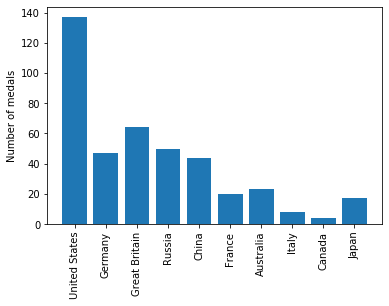

In [38]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

# Stacked bar chart

A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

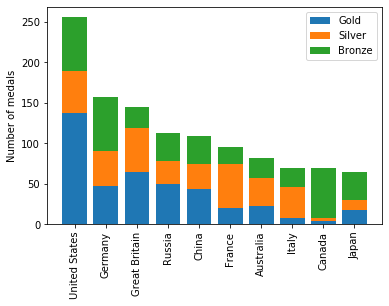

In [42]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label = 'Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label ='Bronze')

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

# Display the legend
ax.legend()

plt.show()

In [99]:
url5 ='https://assets.datacamp.com/production/repositories/3634/datasets/67d7344085ace400d612275b87738615698127a3/summer2016.csv'
summer_2016_medals =pd.read_csv(url5)

summer_2016_medals.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [100]:
mens_rowing = summer_2016_medals[(summer_2016_medals["Sex"] == 'M') & (summer_2016_medals["Sport"] == 'Rowing')]

mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
93,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
97,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
119,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


In [101]:
mens_gymnastics = sports[(sports["Sex"] == 'M') & (sports["Sport"] == 'Gymnastics')]
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


# Creating histograms

Histograms show the full distribution of a variable.

Text(0, 0.5, '# of observations')

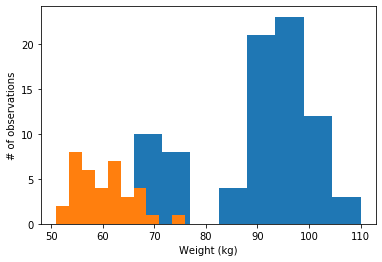

In [84]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)" )

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")


# "Step" histogram

Histograms allow us to see the distributions of the data in different groups in our data.

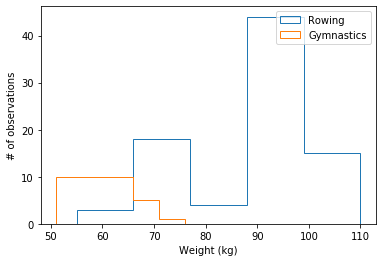

In [85]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label="Rowing",histtype="step", bins= 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label="Gymnastics",histtype="step", bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

# Adding error-bars to a bar chart

Statistical plotting techniques add quantitative information for comparisons into the visualization.  Error bars quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

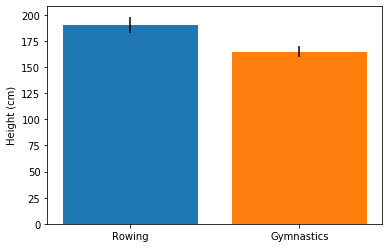

In [86]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

# Adding error-bars to a plot

Adding error-bars to a plot is done by using the errorbars method of the Axes object.

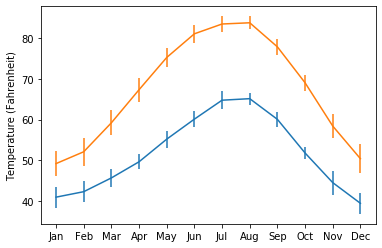

In [87]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(df["MONTH"], df["MLY-TAVG-NORMAL"], yerr=df["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

# Creating boxplots

Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

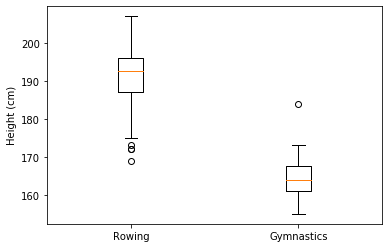

In [88]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']] )

# Add x-axis tick labels:

ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

# Simple scatter plot

Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

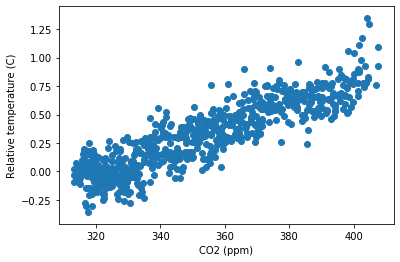

In [89]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

# Encoding time by color

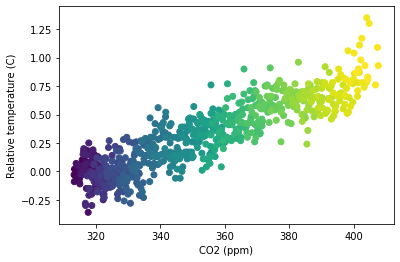

In [90]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

<h1><center>Chapter 4: Sharing visualizations with others</center></h1>

There are different styles to choose from examples include:

* plt.style.use('seaborn-colorblind')
* plt.style.use('grayscale')
* plt.style.use('tableau-colorblind10')
* plt.style.use('bmh')
* plt.style.use('ggplot')


Back to default
* plt.style.use("default")

More styles available at:

https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html


**Guidelines for choosing plotting style**

* Dark backgrounds are usually less visible
* If color is important, consider choosing colorblind-friendly 
 * options"seaborn-colorblind" or "tableau-colorblind10"
* If you think that someone will want to print your gure, use less ink
* If it will be printed in black-and-white, use the "grayscale" style



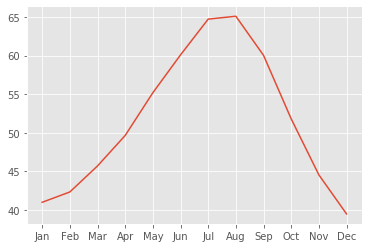

In [93]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(df["MONTH"], df["MLY-TAVG-NORMAL"])
plt.show()

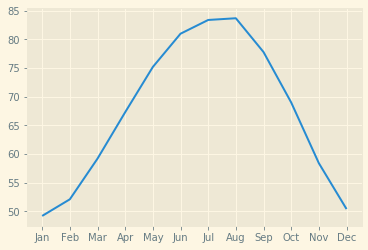

In [94]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()



# Different file formats

**Save as a jpg file**
* fig.savefig("gold_medals.jpg")
* fig.savefig("gold_medals.jpg", quality=50)

**Save as a Svg file - good for editing** <br>
* fig.savefig("gold_medals.svg")
Save as a PNG file <br>
* fig.savefig('my_figure.png')

**Save as a PNG file with 300 dpi** <br>
* fig.savefig('my_figure_300dpi.png', dpi = 300)

**Set figure dimensions and save as a PNG** <br>
fig.savefig('figure_3_5.png') <br>
fig.set_size_inches([3, 5])

**Set figure dimensions and save as a PNG** <br>
fig.savefig('figure_5_3.png') <br>
fig.set_size_inches([5, 3])

# Unique values of a column

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

In [102]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = summer_2016_medals['Sport'].unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


# Automate your visualization

One of the main strengths of Matplotlib is that it can be automated to adapt to the data that it receives as input. For example, if you receive data that has an unknown number of categories, you can still create a bar plot that has bars for each category.

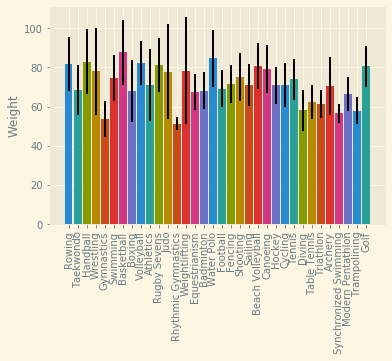

In [104]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

plt.show()


# Where to go Next

If you want to learn more the following links are useful:


* The Matplotlib gallery <br>
https://matplotlib.org/gallery.html

* Plotting data in 3D <br>
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

* Visualizing images with pseudo-color <br>
https://matplotlib.org/tutorials/introductory/images.html

* Animations <br>
https://matplotlib.org/api/animation_api.html

* Using Matplotlib for geospatial data <br>
https://scitools.org.uk/cartopy/docs/latest/

* Seaborn example gallery <br>
https://seaborn.pydata.org/examples/index.html